# Random Forest

### Titanic

In [5]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# Fill missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Encode categoricals
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

# Features & Target
X = df.drop("Survived", axis=1)
y = df["Survived"]

C:\Users\USER\AppData\Local\Temp\ipykernel_16488\183038207.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_16488\183038207.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,max_depth=6,random_state=42)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[94 11]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.8100558659217877


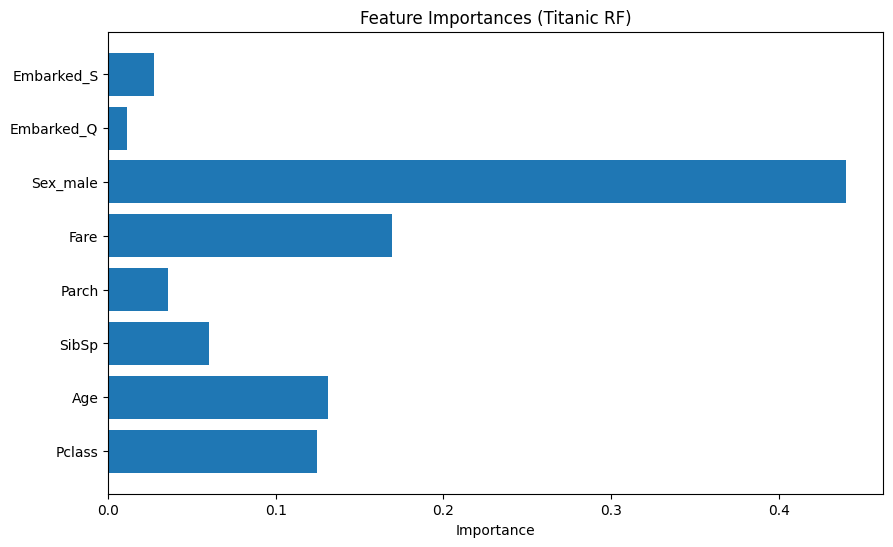

In [11]:
import matplotlib.pyplot as plt

impotance=rf.feature_importances_
features=X.columns

plt.figure(figsize=(10, 6))

plt.barh(features,impotance)
plt.title("Feature Importances (Titanic RF)")
plt.xlabel("Importance")
plt.show()

### Pumpkin Seed


In [29]:
import pandas as pd

pum_df=pd.read_excel("dataset/Pumpkin_Seeds_Dataset.xlsx")

pum_df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [30]:
pum_df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

In [31]:
pum_df.duplicated().sum()

np.int64(0)

In [32]:
pum_df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [33]:
pum_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X=pum_df.drop(columns=["Class"])
y=pum_df["Class"]

y_transformed=LabelEncoder().fit_transform(y)

X_train,X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

In [36]:

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)


cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[215  36]
 [ 36 213]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       251
           1       0.86      0.86      0.86       249

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500

Accuracy: 0.856


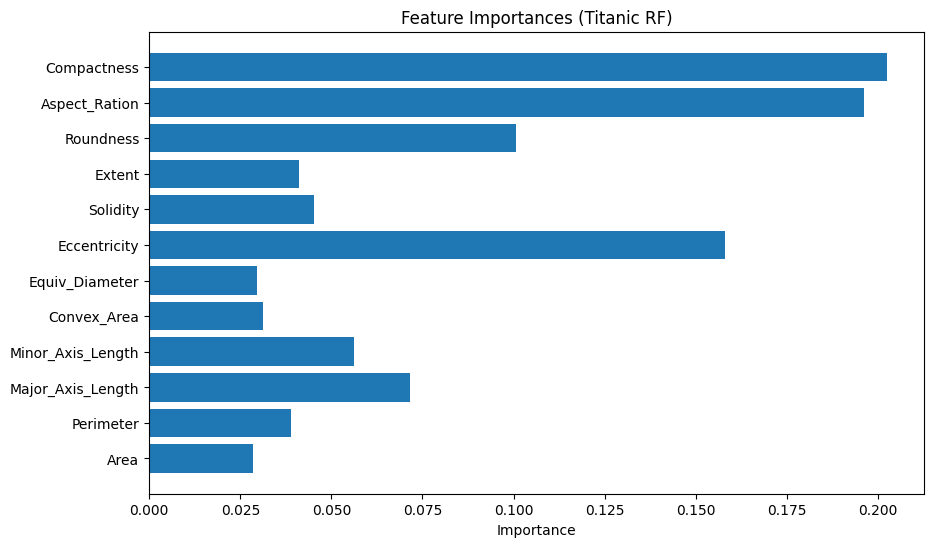

In [ ]:
import matplotlib.pyplot as plt

impotance=rf.feature_importances_
features=X.columns

plt.figure(figsize=(10, 6))

plt.barh(features,impotance)
plt.title("Feature Importances (Titanic RF)")
plt.xlabel("Importance")
plt.show()

<Axes: >

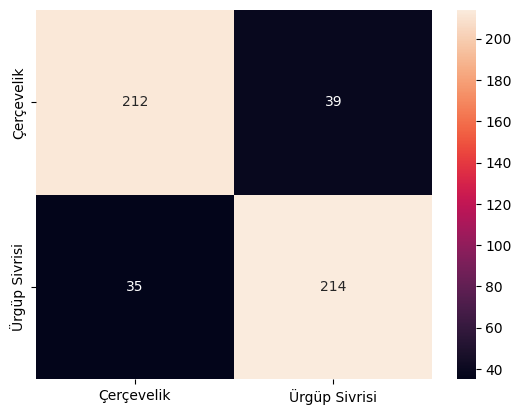

In [ ]:
import seaborn as sns

sns.heatmap(cm,annot=True,xticklabels=y.unique(),yticklabels=y.unique(),fmt="g")

### Weather dataset

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


we_df=pd.read_csv("dataset/Weather_Dataset.csv")

we_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
we_df.shape

(8784, 8)

In [5]:
we_df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [6]:
we_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [7]:
we_df["Weather"].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [8]:
from datetime import datetime
we_df['Date/Time'] = pd.to_datetime(we_df['Date/Time'])
we_df["hour"] = we_df["Date/Time"].dt.hour
we_df["day"] = we_df["Date/Time"].dt.day
we_df["month"] = we_df["Date/Time"].dt.month
we_df["year"] = we_df["Date/Time"].dt.year

In [9]:
we_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,hour,day,month,year
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0,1,1,2012
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,1,1,2012
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2,1,1,2012
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",3,1,1,2012
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4,1,1,2012


In [10]:
we_df.columns=we_df.columns.str.strip()

In [11]:
le = LabelEncoder()
we_df["Weather_Label"] = le.fit_transform(we_df["Weather"])

In [12]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print("Category → Number match:")
print(mapping)

Category → Number match:
{'Clear': np.int64(0), 'Cloudy': np.int64(1), 'Drizzle': np.int64(2), 'Drizzle,Fog': np.int64(3), 'Drizzle,Ice Pellets,Fog': np.int64(4), 'Drizzle,Snow': np.int64(5), 'Drizzle,Snow,Fog': np.int64(6), 'Fog': np.int64(7), 'Freezing Drizzle': np.int64(8), 'Freezing Drizzle,Fog': np.int64(9), 'Freezing Drizzle,Haze': np.int64(10), 'Freezing Drizzle,Snow': np.int64(11), 'Freezing Fog': np.int64(12), 'Freezing Rain': np.int64(13), 'Freezing Rain,Fog': np.int64(14), 'Freezing Rain,Haze': np.int64(15), 'Freezing Rain,Ice Pellets,Fog': np.int64(16), 'Freezing Rain,Snow Grains': np.int64(17), 'Haze': np.int64(18), 'Mainly Clear': np.int64(19), 'Moderate Rain,Fog': np.int64(20), 'Moderate Snow': np.int64(21), 'Moderate Snow,Blowing Snow': np.int64(22), 'Mostly Cloudy': np.int64(23), 'Rain': np.int64(24), 'Rain Showers': np.int64(25), 'Rain Showers,Fog': np.int64(26), 'Rain Showers,Snow Showers': np.int64(27), 'Rain,Fog': np.int64(28), 'Rain,Haze': np.int64(29), 'Rain,Ice 

In [13]:
features = [
    "Temp_C", "Dew Point Temp_C", "Rel Hum_%", "Wind Speed_km/h",
    "Visibility_km", "Press_kPa", "hour", "day", "month", "year"
]

X = we_df[features]
y = we_df["Weather_Label"]


X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf=RandomForestClassifier(max_depth=6,n_estimators=5,random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [18]:
class_names=le.classes_

cm=confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n",cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred,labels=le.transform(class_names), target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[118  17   0 ...   0   0   0]
 [ 33 151   0 ...   0   0   0]
 [  0   5   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   1   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]

Classification Report:
                                          precision    recall  f1-score   support

                                  Clear       0.48      0.47      0.48       251
                                 Cloudy       0.43      0.42      0.43       356
                                Drizzle       0.00      0.00      0.00         9
                            Drizzle,Fog       0.25      0.11      0.15        18
                Drizzle,Ice Pellets,Fog       0.00      0.00      0.00         0
                           Drizzle,Snow       0.00      0.00      0.00         1
                       Drizzle,Snow,Fog       0.00      0.00      0.00         1
                                    Fog       0.44      0.49      0.46        35
                       Freezing Dr

c:\ProgramData\anaconda3\envs\exassaro\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\envs\exassaro\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\envs\exassaro\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

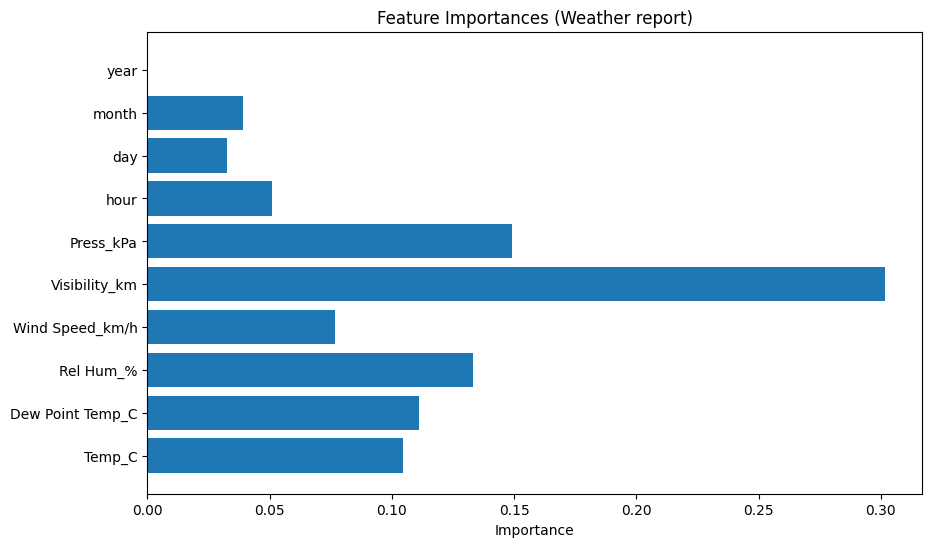

In [19]:
import matplotlib.pyplot as plt

impotance=rf.feature_importances_
features=X.columns

plt.figure(figsize=(10, 6))

plt.barh(features,impotance)
plt.title("Feature Importances (Weather report)")
plt.xlabel("Importance")
plt.show()